In [1]:
import numpy as np
import cv2
from skimage.feature import hog

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features



In [1001]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

%matplotlib inline
# dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
# svc = dist_pickle["svc"]
# X_scaler = dist_pickle["scaler"]
# orient = dist_pickle["orient"]
# pix_per_cell = dist_pickle["pix_per_cell"]
# cell_per_block = dist_pickle["cell_per_block"]
# spatial_size = dist_pickle["spatial_size"]
# hist_bins = dist_pickle["hist_bins"]



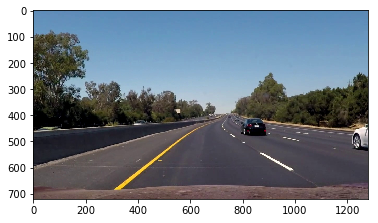

In [1025]:
img = mpimg.imread('./project_video_imgs/project_video_frame01190.jpg')
plt.imshow(img)

In [1026]:
draw_img = np.copy(img)
img = img.astype(np.float32)/255

In [1027]:
# test1.jpg
# ystart = 400
# ystop = 528
# scale = 1.5

# test3.jpg
# ystart = 400
# ystop = 500
# scale = 1

# project_video_frame00714.jpg
ystart = 400
ystop = 720
scale = 3.5

# # project_video_frame00740.jpg 770
# ystart = 400
# ystop = 650
# scale = 2

# ystart = 400
# ystop = 580
# scale = 1.5

# test3.jpg
ystart = 400
ystop = 500
scale = 1

In [1028]:
img_tosearch = img[ystart:ystop,:,:]
ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')

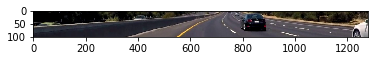

In [1029]:
plt.imshow(img_tosearch)

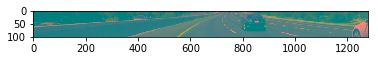

In [1030]:
plt.imshow(ctrans_tosearch)

In [1031]:
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

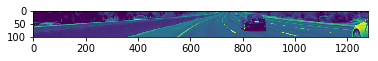

In [1032]:
plt.imshow(ch1)

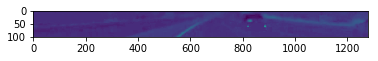

In [1033]:
plt.imshow(ch2)

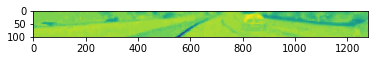

In [1034]:
plt.imshow(ch3)

In [1035]:
ctrans_tosearch.shape

(100, 1280, 3)

In [1036]:
ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
ctrans_tosearch.shape

(120, 853, 3)

In [1037]:
ch1 = ctrans_tosearch[:,:,0]
ch2 = ctrans_tosearch[:,:,1]
ch3 = ctrans_tosearch[:,:,2]

In [1038]:
orient=9
pix_per_cell=8
cell_per_block=2
spatial_size=(32,32)
hist_bins=32

# Define blocks and steps as above - assumption here is with stride of 1 block
nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
nfeat_per_block = orient*cell_per_block**2

In [1039]:
print(nxblocks, nyblocks, nfeat_per_block)

105 14 36


In [1040]:
# 64 was the orginal sampling rate, with 8x8 cells and 8 pix per cell
window = 64
nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
cells_per_step = 2  # Instead of overlap, define how many cells to step
nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
nysteps = (nyblocks - nblocks_per_window) // cells_per_step

In [1041]:
print(nblocks_per_window, cells_per_step, nxsteps, nysteps)

7 2 49 3


In [1042]:
hog1, hog1_im = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False, vis=True)
hog2, hog2_im = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False, vis=True)
hog3, hog3_im = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False, vis=True)

/home/vuiseng9/miniconda2/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [1043]:
hog1_im.shape

(120, 853)

In [1044]:
hog1.shape

(14, 105, 2, 2, 9)

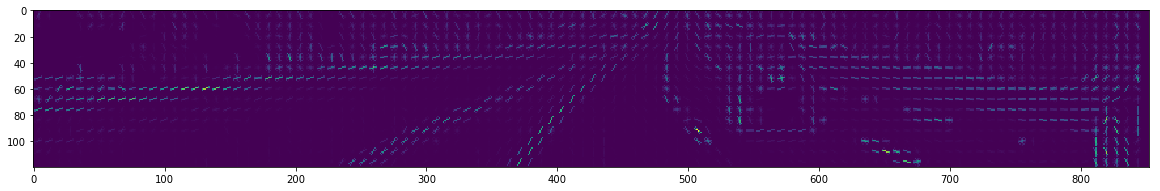

In [1045]:
plt.figure(figsize=(20,10))
plt.imshow(hog1_im)

In [1046]:
for xb in range(nxsteps+1):
    for yb in range(nysteps):
        ypos = yb*cells_per_step
        xpos = xb*cells_per_step
        # Extract HOG for this patch
        hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
        hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
        hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
        hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
        
        xleft = xpos*pix_per_cell
        ytop = ypos*pix_per_cell

        # Extract the image patch
        patch_img = ctrans_tosearch[ytop:ytop+window, xleft:xleft+window]
        subimg = cv2.resize(patch_img, (64,64))

        print("xb:", xb, "yb:", yb, "ypos:", ypos, "xpos:", xpos, 
              "hog_feat1 size:", hog_feat1.shape, "xleft:", xleft, "ytop:", ytop,
             "patch_img:", patch_img.shape, "subimg:", subimg.shape)
        
#         # Get color features
#         spatial_features = bin_spatial(subimg, size=spatial_size)
#         hist_features = color_hist(subimg, nbins=hist_bins)

#         # Scale features and make a prediction
#         test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
#         #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
#         test_prediction = svc.predict(test_features)

#         if test_prediction == 1:
        #if ( xb < 100 ) &  (yb == 0):
        xbox_left = np.int(xleft*scale)
        ytop_draw = np.int(ytop*scale)
        win_draw = np.int(window*scale)
        cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 


xb: 0 yb: 0 ypos: 0 xpos: 0 hog_feat1 size: (1764,) xleft: 0 ytop: 0 patch_img: (64, 64, 3) subimg: (64, 64, 3)
xb: 0 yb: 1 ypos: 2 xpos: 0 hog_feat1 size: (1764,) xleft: 0 ytop: 16 patch_img: (64, 64, 3) subimg: (64, 64, 3)
xb: 0 yb: 2 ypos: 4 xpos: 0 hog_feat1 size: (1764,) xleft: 0 ytop: 32 patch_img: (64, 64, 3) subimg: (64, 64, 3)
xb: 1 yb: 0 ypos: 0 xpos: 2 hog_feat1 size: (1764,) xleft: 16 ytop: 0 patch_img: (64, 64, 3) subimg: (64, 64, 3)
xb: 1 yb: 1 ypos: 2 xpos: 2 hog_feat1 size: (1764,) xleft: 16 ytop: 16 patch_img: (64, 64, 3) subimg: (64, 64, 3)
xb: 1 yb: 2 ypos: 4 xpos: 2 hog_feat1 size: (1764,) xleft: 16 ytop: 32 patch_img: (64, 64, 3) subimg: (64, 64, 3)
xb: 2 yb: 0 ypos: 0 xpos: 4 hog_feat1 size: (1764,) xleft: 32 ytop: 0 patch_img: (64, 64, 3) subimg: (64, 64, 3)
xb: 2 yb: 1 ypos: 2 xpos: 4 hog_feat1 size: (1764,) xleft: 32 ytop: 16 patch_img: (64, 64, 3) subimg: (64, 64, 3)
xb: 2 yb: 2 ypos: 4 xpos: 4 hog_feat1 size: (1764,) xleft: 32 ytop: 32 patch_img: (64, 64, 3) 

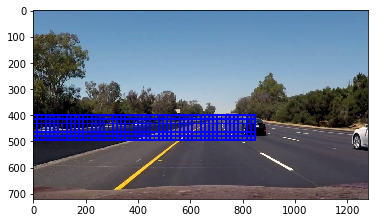

In [1047]:
plt.imshow(draw_img)